In [132]:
#import the libraries
import requests
from bs4 import BeautifulSoup

In [23]:
url="https://fbref.com/en/comps/9/Premier-League-Stats"

In [29]:
data=requests.get(url)
data

<Response [200]>

In [30]:
#to prettify the content from the webpage we use beautifulsoup
a=BeautifulSoup(b.text)
type(a)

bs4.BeautifulSoup

In [31]:
print(a.prettify()) #to look as per html tags

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://cdn.ssref.net/req/202408232" rel="dns-prefetch"/>
   <script>
    /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
   </script>
   <script src="https://cmp.osano.com/16C

In [54]:
#squads
a.find('td',{'class':'left',
             'data-stat':'team'}).text
#<td class="left " data-stat="team"><img itemscope="image" height="13" width="13" src="https://cdn.ssref.net/req/202408232/tlogo/fb/mini.d07537b9.png" alt="Club Crest" style="vertical-align:text-top"> <a href="/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats">Brighton</a></td>

' Brighton'

In [37]:
a.find('td',{'class':'right',
             'data-stat':'games'}).text
#<td class="right " data-stat="games">1</td>

'1'

In [38]:
a.find('td',{'class':'right',
             'data-stat':'wins'}).text

'1'

In [39]:
a.find('td',{'class':'right',
             'data-stat':'ties'}).text

'0'

In [40]:
a.find('td',{'class':'right',
             'data-stat':'losses'}).text

'0'

In [41]:
a.find('td',{'class':'right',
             'data-stat':'goals_for'}).text

'3'

In [42]:
a.find('td',{'class':'right',
             'data-stat':'goals_against'}).text

'0'

In [46]:
a.find('td',{'class':'right',
             'data-stat':'points'}).text

'3'

In [47]:
a.find('td',{'class':'right',
             'data-stat':'points_avg'}).text

'3.00'

In [48]:
a.find('td',{'class':'right',
             'data-stat':'xg_for'}).text

'1.4'

In [49]:
a.find('td',{'class':'right',
             'data-stat':'xg_against'}).text

'0.5'

In [50]:
a.find('td',{'class':'right',
             'data-stat':'xg_diff'}).text

'+1.0'

In [51]:
a.find('td',{'class':'right',
             'data-stat':'xg_diff_per90'}).text

'+0.98'

In [53]:
a.find('td',{'class':'left',
             'data-stat':'last_5'}).text
#<td class="left " data-stat="last_5" csk="3"><div style="display:inline-block"><div style="display:inline-block; border-radius:2px; background-color:green; width:15px; text-align:center" class="poptip" tip="<strong>August 17, 2024</strong><br>Everton 0–3 Brighton"><a style="color:#fff; text-decoration:none; background-color: transparent" href="/en/matches/71618ace/Everton-Brighton-and-Hove-Albion-August-17-2024-Premier-League">W</a></div></div></td>

'W'

In [59]:
import time,random
from IPython.display import clear_output

In [73]:
'''#now let us create lists to store data
Squads=[]; Matchesplayed=[];Wins=[];Draws=[];Losses=[];Goals_for=[];Goals_Against=[];Points=[];P_M=[];Expected_Goals=[];Expected_Goals_Allows=[];Expected_Goals_Diff=[];Expected_Goals_Diff90=[];CLabel=[]

for i in range(1,21):
    base_url=f"https://fbref.com/en/comps/9/Premier-League-Stats={i}"
    print(f'Scraping from page{i}')
    clear_output(wait=True)
    time.sleep(5)
    #connect to web page
    d=requests.get(base_url)
    soup=BeautifulSoup(d.text,'html')
    #squads
    a=soup.find_all('td',{'class':'left','data-stat':'team'})
    for i in a:
        i=i.text
        Squads.append(i)
    #MatchesPlayed
    b=soup.find_all('td',{'class':'right','data-stat':'games'})
    for i in b:
        i=i.text
        Matchesplayed.append(i)
    #Wins
    c=soup.find_all('td',{'class':'right','data-stat':'wins'})
    for i in c:
        i=i.text
        Wins.append(i)
    #Draws
    d=soup.find_all('td',{'class':'right','data-stat':'ties'})
    for i in d:
        i=i.text
        Draws.append(i)
    #Losses
    e=soup.find_all('td',{'class':'right','data-stat':'losses'})
    for i in e:
        i=i.text
        Losses.append(i)
    #Goals_for
    f=soup.find_all('td',{'class':'right','data-stat':'goals_for'})
    for i in f:
        i=i.text
        Goals_for.append(i)
    #Goals_Against
    g=soup.find_all('td',{'class':'right','data-stat':'goals_against'})
    for i in g:
        i=i.text
        Goals_Against.append(i)
    #Points
    h=soup.find_all('td',{'class':'right','data-stat':'points'})
    for i in h:
        i=i.text
        Points.append(i)
    #P/M
    i=soup.find_all('td',{'class':'right','data-stat':'points_avg'})
    for x in i:
        x=x.text
        P_M.append(x)
    #Expected_Goals
    j=soup.find_all('td',{'class':'right','data-stat':'xg_for'})
    for x in j:
        x=x.text
        Expected_Goals.append(x)
    #Expected_Goals_Allows
    k=soup.find_all('td',{'class':'right','data-stat':'xg_against'})
    for x in j:
        x=x.text
        Expected_Goals_Allows.append(x)
    #Expected_Goals_Diff
    l=soup.find_all('td',{'class':'right','data-stat':'xg_diff'})
    for x in j:
        x=x.text
        Expected_Goals_Diff.append(x)
    #Expected_Goals_Diff90
    m=soup.find_all('td',{'class':'right','data-stat':'xg_diff_per90'})
    for x in j:
        x=x.text
        Expected_Goals_Diff90.append(x)
    #CLabel
    n=soup.find_all('td',{'class':'left','data-stat':'last_5'})
    for x in j:
        x=x.text
        CLabel.append(x)
'''


Scraping from page20


In [91]:
unique_squads = []
for squad in Squads:
    if squad not in unique_squads:
        unique_squads.append(squad)

print(unique_squads)


[' Brighton', ' Arsenal', ' Liverpool', ' Manchester City', ' Aston Villa', ' Brentford', ' Manchester Utd', ' Newcastle Utd', ' Bournemouth', ' Tottenham', ' Leicester City', " Nott'ham Forest", ' Crystal Palace', ' West Ham', ' Fulham', ' Southampton', ' Chelsea', ' Ipswich Town', ' Wolves', ' Everton']


In [137]:
import requests
from bs4 import BeautifulSoup
import time

# Lists to store the scraped data
Squads = []
Wins = []
Draws = []
Losses = []
Goals_for = []
Goals_Against = []
Points = []
P_M = []
Expected_Goals = []
Expected_Goals_Allows = []
Expected_Goals_Diff = []
Expected_Goals_Diff90 = []
CLabel = []

# Base URL for scraping
base_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

# Connect to the web page and parse the content
print('Scraping data...')
d = requests.get(base_url)
soup = BeautifulSoup(d.text, 'html.parser')

# Scraping different stats
# Squads

for i in unique_squads:
    Squads.append(i)

# Wins
c = soup.find_all('td', {'class': 'right', 'data-stat': 'wins'})
for i in c:
    Wins.append(i.text)

# Draws
d = soup.find_all('td', {'class': 'right', 'data-stat': 'ties'})
for i in d:
    Draws.append(i.text)

# Losses
e = soup.find_all('td', {'class': 'right', 'data-stat': 'losses'})
for i in e:
    Losses.append(i.text)

# Goals For
f = soup.find_all('td', {'class': 'right', 'data-stat': 'goals_for'})
for i in f:
    Goals_for.append(i.text)

# Goals Against
g = soup.find_all('td', {'class': 'right', 'data-stat': 'goals_against'})
for i in g:
    Goals_Against.append(i.text)

# Points
h = soup.find_all('td', {'class': 'right', 'data-stat': 'points'})
for i in h:
    Points.append(i.text)

# Points per Match
i = soup.find_all('td', {'class': 'right', 'data-stat': 'points_avg'})
for x in i:
    P_M.append(x.text)

# Expected Goals
j = soup.find_all('td', {'class': 'right', 'data-stat': 'xg_for'})
for x in j:
    Expected_Goals.append(x.text)

# Expected Goals Allowed
k = soup.find_all('td', {'class': 'right', 'data-stat': 'xg_against'})
for x in k:
    Expected_Goals_Allows.append(x.text)

# Expected Goals Difference
l = soup.find_all('td', {'class': 'right', 'data-stat': 'xg_diff'})
for x in l:
    Expected_Goals_Diff.append(x.text)

# Expected Goals Difference per 90
m = soup.find_all('td', {'class': 'right', 'data-stat': 'xg_diff_per90'})
for x in m:
    Expected_Goals_Diff90.append(x.text)

# Last 5 Matches (Form Label)
n = soup.find_all('td', {'class': 'left', 'data-stat': 'last_5'})
for x in n:
    CLabel.append(x.text)

print('Scraping completed!')



Scraping data...
Scraping completed!


In [138]:
print(len(Squads))
print(len(Wins))
print(len(Draws))
print(len(Losses))
print(len(Goals_for))
print(len(Goals_Against))
print(len(Points))
print(len(P_M))
print(len(Expected_Goals))
print(len(Expected_Goals_Allows))
print(len(Expected_Goals_Diff))
print(len(Expected_Goals_Diff90))
print(len(CLabel))

20
20
20
20
20
20
20
20
20
20
20
20
20


In [75]:
import pandas as pd

In [139]:
ds=pd.DataFrame({'Squads':Squads,
                 'Wins':Wins,
                 'Draws':Draws,
                 'Losses':Losses,
                 'Goals_for':Goals_for,
                 'Goals_Against':Goals_Against,
                 'Points':Points,
                 'Points_per_match':P_M,
                 'Expected_Goals':Expected_Goals,
                 'Expected_Goals_Allows':Expected_Goals_Allows,
                 'Expected_Goals_Diff':Expected_Goals_Diff,
                 'Expected_Goals_Diff90':Expected_Goals_Diff90,
                 'CLabel':CLabel})
ds

,Squads,Wins,Draws,Losses,Goals_for,Goals_Against,Points,Points_per_match,Expected_Goals,Expected_Goals_Allows,Expected_Goals_Diff,Expected_Goals_Diff90,CLabel
0,Brighton,1,0,0,3,0,3,3.00,1.4,0.5,+1.0,+0.98,W
1,Arsenal,1,0,0,2,0,3,3.00,1.2,0.5,+0.8,+0.77,W
2,Liverpool,1,0,0,2,0,3,3.00,2.6,0.5,+2.1,+2.11,W
3,Manchester City,1,0,0,2,0,3,3.00,0.8,1.0,-0.2,-0.19,W
4,Aston Villa,1,0,0,2,1,3,3.00,2.0,2.3,-0.3,-0.32,W
5,Brentford,1,0,0,2,1,3,3.00,1.6,1.2,+0.4,+0.42,W
6,Manchester Utd,1,0,0,1,0,3,3.00,2.4,0.4,+2.0,+2.00,W
7,Newcastle Utd,1,0,0,1,0,3,3.00,0.3,1.8,-1.5,-1.50,W
8,Bournemouth,0,1,0,1,1,1,1.00,1.2,1.3,-0.1,-0.09,D
9,Tottenham,0,1,0,1,1,1,1.00,1.2,1.0,+0.1,+0.13,D


In [140]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Squads                 20 non-null     object
 1   Wins                   20 non-null     object
 2   Draws                  20 non-null     object
 3   Losses                 20 non-null     object
 4   Goals_for              20 non-null     object
 5   Goals_Against          20 non-null     object
 6   Points                 20 non-null     object
 7   Points_per_match       20 non-null     object
 8   Expected_Goals         20 non-null     object
 9   Expected_Goals_Allows  20 non-null     object
 10  Expected_Goals_Diff    20 non-null     object
 11  Expected_Goals_Diff90  20 non-null     object
 12  CLabel                 20 non-null     object
dtypes: object(13)
memory usage: 2.2+ KB


In [141]:
ds

,Squads,Wins,Draws,Losses,Goals_for,Goals_Against,Points,Points_per_match,Expected_Goals,Expected_Goals_Allows,Expected_Goals_Diff,Expected_Goals_Diff90,CLabel
0,Brighton,1,0,0,3,0,3,3.00,1.4,0.5,+1.0,+0.98,W
1,Arsenal,1,0,0,2,0,3,3.00,1.2,0.5,+0.8,+0.77,W
2,Liverpool,1,0,0,2,0,3,3.00,2.6,0.5,+2.1,+2.11,W
3,Manchester City,1,0,0,2,0,3,3.00,0.8,1.0,-0.2,-0.19,W
4,Aston Villa,1,0,0,2,1,3,3.00,2.0,2.3,-0.3,-0.32,W
5,Brentford,1,0,0,2,1,3,3.00,1.6,1.2,+0.4,+0.42,W
6,Manchester Utd,1,0,0,1,0,3,3.00,2.4,0.4,+2.0,+2.00,W
7,Newcastle Utd,1,0,0,1,0,3,3.00,0.3,1.8,-1.5,-1.50,W
8,Bournemouth,0,1,0,1,1,1,1.00,1.2,1.3,-0.1,-0.09,D
9,Tottenham,0,1,0,1,1,1,1.00,1.2,1.0,+0.1,+0.13,D


In [116]:
ds['Wins'].unique()

array(['1', '0'], dtype=object)

In [142]:
ds['Squads']=ds['Squads'].astype(str)
ds['Wins'] = ds['Wins'].astype(int)
ds['Draws'] = ds['Draws'].astype(int)
ds['Losses'] = ds['Losses'].astype(int)
ds['Goals_for'] = ds['Goals_for'].astype(int)
ds['Goals_Against'] = ds['Goals_Against'].astype(int)
ds['Points'] = ds['Points'].astype(int)
ds['Points_per_match'] = ds['Points_per_match'].astype(float)
ds['Expected_Goals'] = ds['Expected_Goals'].astype(float)
ds['Expected_Goals_Allows'] = ds['Expected_Goals_Allows'].astype(float)
ds['Goals_for'] = ds['Goals_for'].astype(float)
ds['Expected_Goals_Diff'] = ds['Expected_Goals_Diff'].astype(float)
ds['Expected_Goals_Diff90'] = ds['Expected_Goals_Diff90'].astype(float)
ds['CLabel'] = ds['CLabel'].astype(str)

In [143]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Squads                 20 non-null     object 
 1   Wins                   20 non-null     int64  
 2   Draws                  20 non-null     int64  
 3   Losses                 20 non-null     int64  
 4   Goals_for              20 non-null     float64
 5   Goals_Against          20 non-null     int64  
 6   Points                 20 non-null     int64  
 7   Points_per_match       20 non-null     float64
 8   Expected_Goals         20 non-null     float64
 9   Expected_Goals_Allows  20 non-null     float64
 10  Expected_Goals_Diff    20 non-null     float64
 11  Expected_Goals_Diff90  20 non-null     float64
 12  CLabel                 20 non-null     object 
dtypes: float64(6), int64(5), object(2)
memory usage: 2.2+ KB


In [144]:
ds['Draws'].unique()

array([0, 1])

In [145]:
ds['Points_per_match'].unique()

array([3., 1., 0.])

In [146]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
label=LabelEncoder()
label

LabelEncoder()

In [149]:
ds['Points_per_match']=label.fit_transform(ds['Points_per_match'])
ds['Points_per_match']

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Points_per_match, dtype: int64

In [150]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Squads                 20 non-null     object 
 1   Wins                   20 non-null     int64  
 2   Draws                  20 non-null     int64  
 3   Losses                 20 non-null     int64  
 4   Goals_for              20 non-null     float64
 5   Goals_Against          20 non-null     int64  
 6   Points                 20 non-null     int64  
 7   Points_per_match       20 non-null     int64  
 8   Expected_Goals         20 non-null     float64
 9   Expected_Goals_Allows  20 non-null     float64
 10  Expected_Goals_Diff    20 non-null     float64
 11  Expected_Goals_Diff90  20 non-null     float64
 12  CLabel                 20 non-null     object 
dtypes: float64(5), int64(6), object(2)
memory usage: 2.2+ KB


In [153]:
#data['CLabel'] = label.fit_transform(data['CLabel'])

ds['CLabel']=label.fit_transform(ds['CLabel'])
ds['CLabel']

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: CLabel, dtype: int64

In [154]:
#Plotly --->Data Visualization
!pip install plotly


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
import plotly

In [156]:
ds.columns

Index(['Squads', 'Wins', 'Draws', 'Losses', 'Goals_for', 'Goals_Against',
       'Points', 'Points_per_match', 'Expected_Goals', 'Expected_Goals_Allows',
       'Expected_Goals_Diff', 'Expected_Goals_Diff90', 'CLabel'],
      dtype='object')

In [157]:
import plotly.express as px

In [159]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 960.0 kB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.8 MB 4.8 MB/s eta 0:00:02
   - -------------------------------------- 0.4/7.8 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.8 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.8 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.8 MB 5.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 4.9 MB/s eta 0:00:02
   ------------ --------------------------- 2.5/7.8 MB 7.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 7.3 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

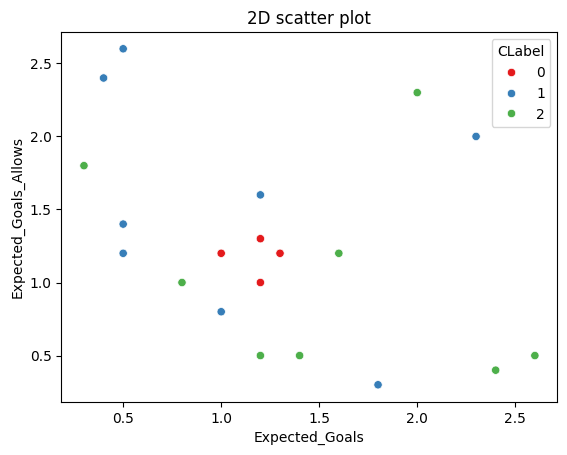

In [165]:
#scatter plot
sns.scatterplot(data=ds,x='Expected_Goals',y='Expected_Goals_Allows',hue='CLabel',palette='Set1')
plt.title('2D scatter plot')
plt.show()

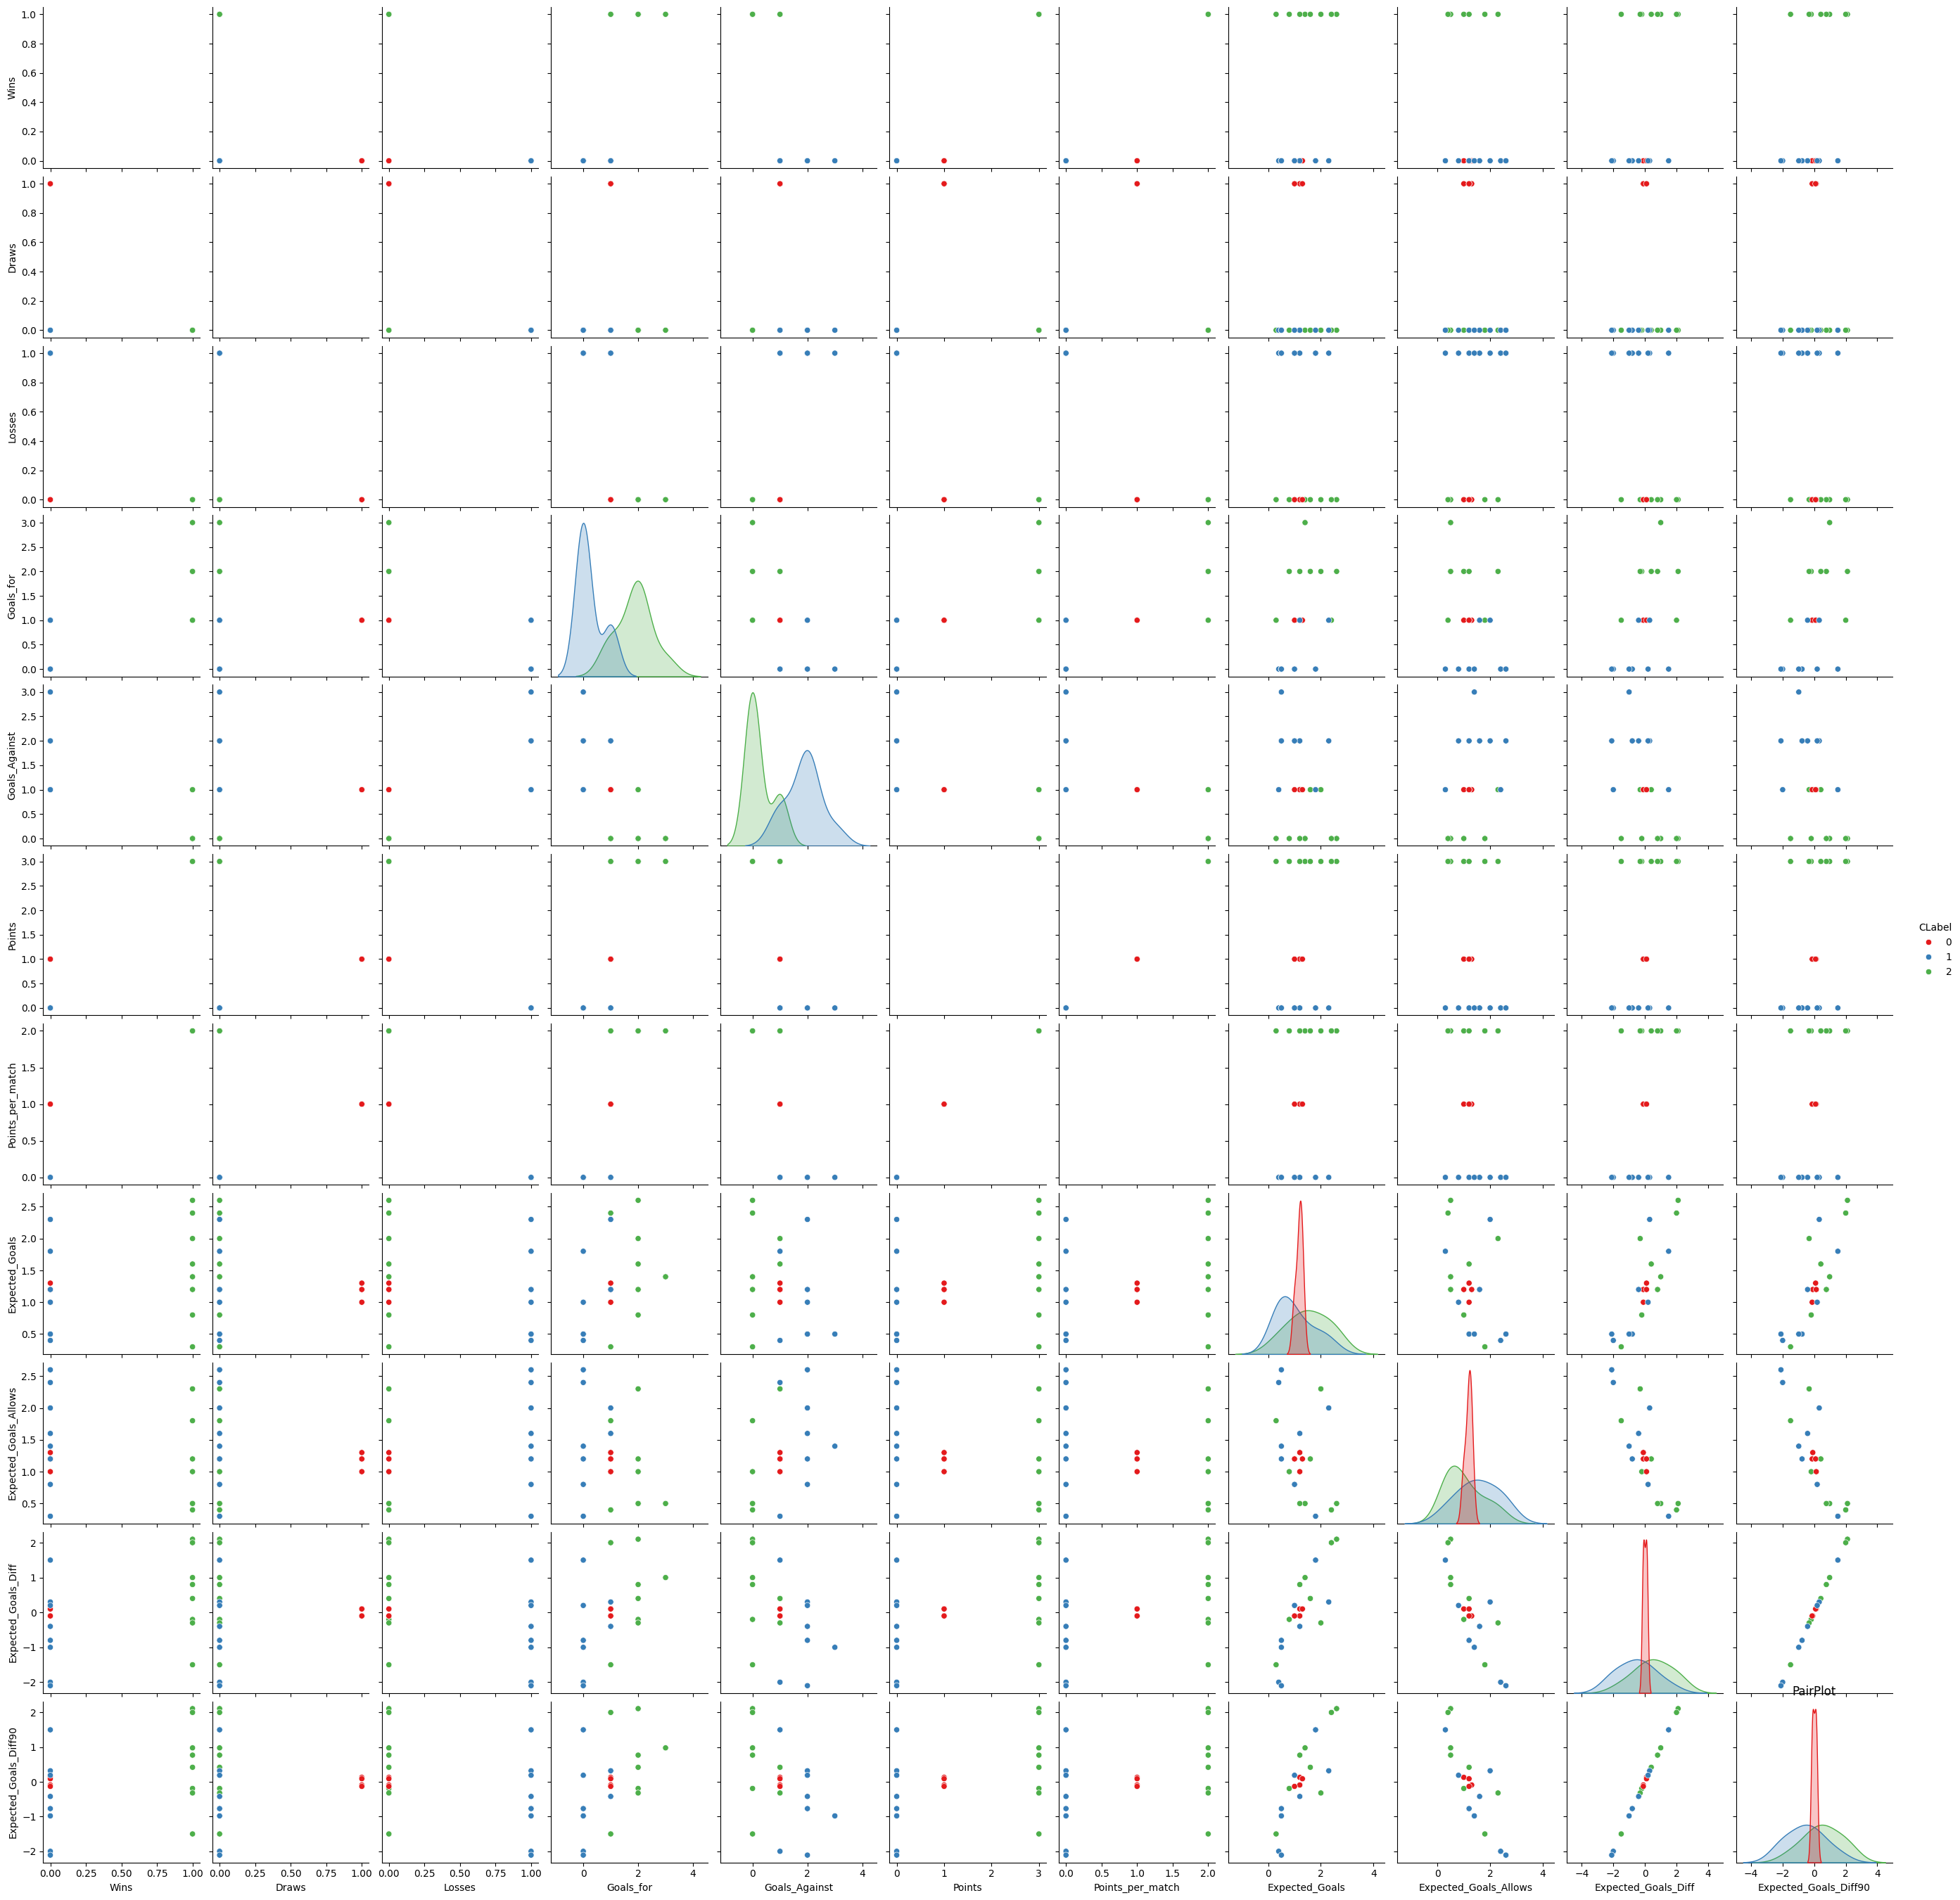

In [166]:
#pair plot
sns.pairplot(ds,hue='CLabel',palette='Set1')
plt.title('PairPlot')
plt.show()

In [196]:
ds['Squads']=label.fit_transform(ds['Squads'])

In [197]:
#we will use abouve dataframe to build regression models -->linear regression
#polynomial regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [198]:
#define the dependent and independent variables
x=ds.drop('CLabel',axis=1)
y=ds['CLabel']

In [199]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [207]:
x_train

,Squads,Wins,Draws,Losses,Goals_for,Goals_Against,Points,Points_per_match,Expected_Goals,Expected_Goals_Allows,Expected_Goals_Diff,Expected_Goals_Diff90
5,3,1,0,0,2.0,1,3,2,1.6,1.2,0.4,0.42
11,15,0,1,0,1.0,1,1,1,1.3,1.2,0.1,0.09
3,12,1,0,0,2.0,0,3,2,0.8,1.0,-0.2,-0.19
18,19,0,0,1,0.0,2,0,0,0.5,1.2,-0.8,-0.77
16,5,0,0,1,0.0,2,0,0,1.0,0.8,0.2,0.19
13,18,0,0,1,1.0,2,0,0,2.3,2.0,0.3,0.32
2,11,1,0,0,2.0,0,3,2,2.6,0.5,2.1,2.11
9,17,0,1,0,1.0,1,1,1,1.2,1.0,0.1,0.13
19,7,0,0,1,0.0,3,0,0,0.5,1.4,-1.0,-0.98
4,1,1,0,0,2.0,1,3,2,2.0,2.3,-0.3,-0.32


In [208]:
y_train

5     2
11    0
3     2
18    1
16    1
13    1
2     2
9     0
19    1
4     2
12    1
7     2
10    0
14    1
6     2
Name: CLabel, dtype: int64

In [209]:
print(len(x_train))
print(len(y_train))

15
15


In [201]:
#Test Accuracy of the result
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  

In [202]:
print(x_train.dtypes)

Squads                     int64
Wins                       int64
Draws                      int64
Losses                     int64
Goals_for                float64
Goals_Against              int64
Points                     int64
Points_per_match           int64
Expected_Goals           float64
Expected_Goals_Allows    float64
Expected_Goals_Diff      float64
Expected_Goals_Diff90    float64
dtype: object


In [203]:
#x_train=pd.get_dummies(x_train)

In [204]:
x_train.columns

Index(['Squads', 'Wins', 'Draws', 'Losses', 'Goals_for', 'Goals_Against',
       'Points', 'Points_per_match', 'Expected_Goals', 'Expected_Goals_Allows',
       'Expected_Goals_Diff', 'Expected_Goals_Diff90'],
      dtype='object')

In [205]:
# Logistic Regression to the training set  
    
model= LogisticRegression()  
model.fit(x_train, y_train) 

LogisticRegression()

In [206]:
x_test.columns

Index(['Squads', 'Wins', 'Draws', 'Losses', 'Goals_for', 'Goals_Against',
       'Points', 'Points_per_match', 'Expected_Goals', 'Expected_Goals_Allows',
       'Expected_Goals_Diff', 'Expected_Goals_Diff90'],
      dtype='object')

In [210]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 1, 2, 2])

In [211]:
cm= confusion_matrix(y_test,y_pred)  

In [212]:
cm

array([[0, 0, 1],
       [0, 2, 0],
       [0, 0, 2]])

In [213]:
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [221]:
print("Model accuracy is",(accuracy*100),"%")

Model accuracy is 76.92307692307692 %


In [223]:
squads=int(input("enter squad number:"))
wins=int(input("enter number of wins:"))
draws=int(input("enter number of draws:"))
losses=int(input("enter number of losses:"))
goals_for=int(input("enter number of goals:"))
goals_against=int(input("enter number of goals against:"))
points=int(input("enter number of points:"))
points_per_match=int(input("enter number of points per match:"))
expected_goals=int(input("enter expected goals:"))
expected_goals_allowed=int(input("enter expected goals allowed:"))

enter squad number: 16
enter number of wins: 1
enter number of draws: 0
enter number of losses: 0
enter number of goals: 2
enter number of goals against: 1
enter number of points: 3
enter number of points per match: 3
enter expected goals: 2
enter expected goals allowed: 3


In [224]:
import pickle

In [225]:
with open("House.pkl","wb") as f:
    pickle.dump(model,f)

In [227]:
pred_model=pickle.load(open('House.pkl','rb'))